# grn bench perturb seq


In [1]:
from scprint import scPrint
from scdataloader import Preprocessor
from scprint.tasks import GRNfer

from bengrn import BenGRN, get_perturb_gt

from bengrn.base import train_classifier

from bengrn import compute_genie3, compute_scenic
from grnndata import utils as grnutils

import scanpy as sc

%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

💡 connected lamindb: jkobject/scprint


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


In [2]:
adata = get_perturb_gt()

adata.var["isTF"] = False
adata.var.loc[adata.var.gene_name.isin(grnutils.TF), "isTF"] = True
adata.var["isTF"].sum()
metrics = {}

/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/anndata/_io/specs/registry.py:249: OldFormatWarning: Element '/X' was written without encoding metadata.
  return self.callback(read_func, elem.name, elem, iospec=get_spec(elem))


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/anndata/_io/utils.py:205: OldFormatWarning: Element '/obs/gem_group' was written without encoding metadata.
  return func(*args, **kwargs)
/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/anndata/_io/utils.py:205: OldFormatWarning: Element '/obs/__categories/gene' was written without encoding metadata.
  return func(*args, **kwargs)
/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/anndata/_io/utils.py:205: OldFormatWarning: Element '/obs/gene' was written without encoding metadata.
  return func(*args, **kwargs)
/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/anndata/_io/utils.py:205: OldFormatWarning: Element '/obs/__categories/gene_id' was written without encoding metadata.
  return func(*args, **kwargs)
/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/anndata/_io/uti

In [3]:
preprocessor = Preprocessor(force_preprocess=True, skip_validate=True,
                            do_postp=False, min_valid_genes_id=5000, min_dataset_size=64)
nadata = preprocessor(adata.copy())
adata

Dropping layers:  KeysView(Layers with keys: )
checking raw counts


removed 0 non primary cells, 10691 renamining


filtered out 0 cells, 10691 renamining
Removed 8 genes.


startin QC


Seeing 10068 outliers (94.17% of total dataset):
done


GRnnData object with n_obs × n_vars = 10691 × 8563
    obs: 'gem_group', 'gene', 'gene_id', 'transcript', 'gene_transcript', 'sgID_AB', 'mitopercent', 'UMI_count', 'z_gemgroup_UMI', 'core_scale_factor', 'core_adjusted_UMI_count', 'organism_ontology_term_id'
    var: 'gene_name', 'chr', 'start', 'end', 'class', 'strand', 'length', 'in_matrix', 'mean', 'std', 'cv', 'fano', 'isTF'
    varp: 'GRN'
    with a grn of 1115065 elements

In [4]:
model = scPrint.load_from_checkpoint(
    '/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint_scale/1tghqqzx/checkpoints/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
#    '../data/temp/o2uniqsx/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
#    '../data/temp/wli32e2j/last.ckpt', precpt_gene_emb=None)
#    '../data/temp/vbd8bavn/epoch=17-step=90000.ckpt', precpt_gene_emb=None)
#    '../data/temp/25eer0xz/epoch=20-step=105000.ckpt', precpt_gene_emb=None)
NUM_GENES = 5000
NUM_CELLS = 1024
metrics = {}

[d3graph] INFO> Created a temporary directory at /local/scratch/tmp/tmpd9l5ktlp


[d3graph] INFO> Writing /local/scratch/tmp/tmpd9l5ktlp/_remote_module_non_scriptable.py


RuntimeError caught: scPrint is not attached to a `Trainer`.


In [5]:
grn_inferer = GRNfer(model, nadata[nadata.X.sum(1) > 500],
                     how="most var within",
                     preprocess="softmax",
                     head_agg='none',
                     filtration="none",
                     forward_mode="none",
                     organisms=adata.obs['organism_ontology_term_id'][0],
                     num_genes=NUM_GENES,
                     max_cells=NUM_CELLS,
                     doplot=False,
                     batch_size=32,
                     )
grn = grn_inferer(layer=list(range(model.nlayers))[:])
grn.varp['all'] = grn.varp["GRN"]

/local/scratch/tmp/ipykernel_3699244/2255780205.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],


Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


number of expressed genes in this cell type: 8555


/pasteur/appa/homes/jkalfon/scPRINT/scprint/tasks/grn.py:172: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs["organism_ontology_term_id"][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


SLURM auto-requeueing enabled. Setting signal handlers.


Predicting: |          | 0/? [00:00<?, ?it/s]

precision:  0.02072508763433421 
recall:  1.0 
random precision: 0.02072944989230818



  0%|          | 0/128 [00:00<?, ?it/s]


  2%|▏         | 3/128 [00:00<00:04, 25.27it/s]


  5%|▍         | 6/128 [00:00<00:04, 24.65it/s]


  7%|▋         | 9/128 [00:00<00:04, 24.52it/s]


  9%|▉         | 12/128 [00:00<00:04, 24.64it/s]


 12%|█▏        | 15/128 [00:00<00:04, 24.64it/s]


 14%|█▍        | 18/128 [00:00<00:04, 24.61it/s]


 16%|█▋        | 21/128 [00:00<00:04, 24.63it/s]


 19%|█▉        | 24/128 [00:00<00:04, 24.50it/s]


 21%|██        | 27/128 [00:01<00:04, 24.50it/s]


 23%|██▎       | 30/128 [00:01<00:03, 24.60it/s]


 26%|██▌       | 33/128 [00:01<00:03, 24.64it/s]


 28%|██▊       | 36/128 [00:01<00:03, 24.74it/s]


 30%|███       | 39/128 [00:01<00:03, 24.71it/s]


 33%|███▎      | 42/128 [00:01<00:03, 24.76it/s]


 35%|███▌      | 45/128 [00:01<00:03, 24.78it/s]


 38%|███▊      | 48/128 [00:01<00:03, 24.85it/s]


 40%|███▉      | 51/128 [00:02<00:03, 24.81it/s]


 42%|████▏     | 54/128 [00:02<00:03, 24.65it/s]


 45%|████▍     | 57/128 [00:02<00:02, 24.61it/s]


 47%|████▋     | 60/128 [00:02<00:02, 24.70it/s]


 49%|████▉     | 63/128 [00:02<00:02, 24.77it/s]


 52%|█████▏    | 66/128 [00:02<00:02, 24.77it/s]


 54%|█████▍    | 69/128 [00:02<00:02, 24.79it/s]


 56%|█████▋    | 72/128 [00:02<00:02, 24.85it/s]


 59%|█████▊    | 75/128 [00:03<00:02, 24.82it/s]


 61%|██████    | 78/128 [00:03<00:02, 24.88it/s]


 63%|██████▎   | 81/128 [00:03<00:01, 24.97it/s]


 66%|██████▌   | 84/128 [00:03<00:01, 24.87it/s]


 68%|██████▊   | 87/128 [00:03<00:01, 24.91it/s]


 70%|███████   | 90/128 [00:03<00:01, 24.85it/s]


 73%|███████▎  | 93/128 [00:03<00:01, 24.86it/s]


 75%|███████▌  | 96/128 [00:03<00:01, 24.83it/s]


 77%|███████▋  | 99/128 [00:03<00:01, 24.88it/s]


 80%|███████▉  | 102/128 [00:04<00:01, 25.11it/s]


 82%|████████▏ | 105/128 [00:04<00:00, 25.22it/s]


 84%|████████▍ | 108/128 [00:04<00:00, 25.25it/s]


 87%|████████▋ | 111/128 [00:04<00:00, 25.27it/s]


 89%|████████▉ | 114/128 [00:04<00:00, 25.26it/s]


 91%|█████████▏| 117/128 [00:04<00:00, 25.27it/s]


 94%|█████████▍| 120/128 [00:04<00:00, 25.31it/s]


 96%|█████████▌| 123/128 [00:04<00:00, 25.31it/s]


 98%|█████████▊| 126/128 [00:05<00:00, 25.33it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:05<00:00, 24.87it/s]

Area Under Precision-Recall Curve (AUPRC):  0.01647425025253478
EPR: 0.6538203685524024


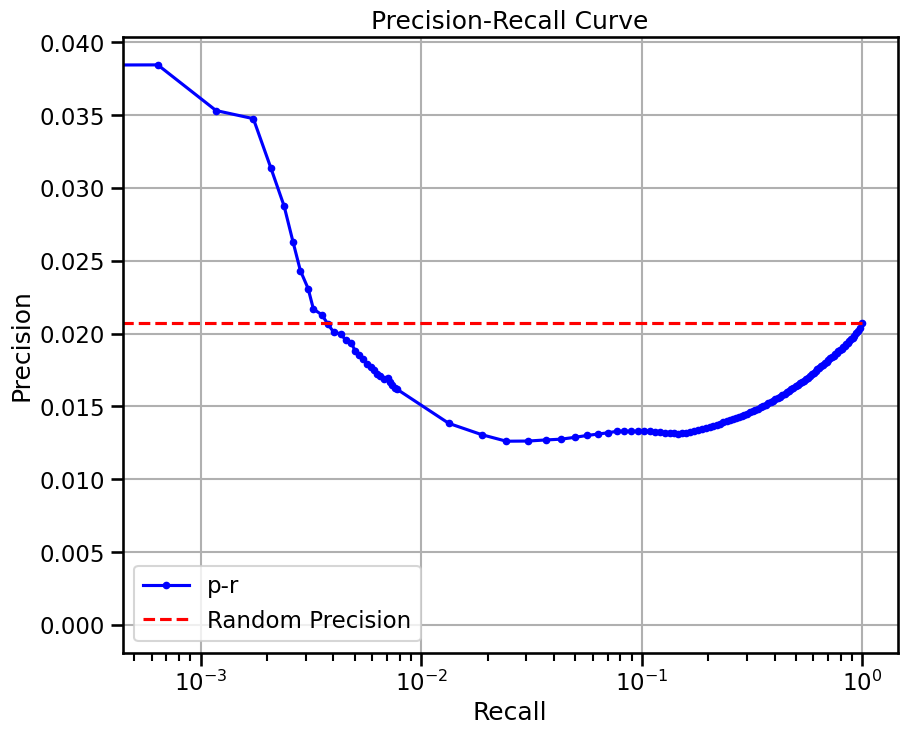

In [6]:
grn.varp['GRN'] = grn.varp["all"][:,:,-4:].mean(-1).T
metrics['scprint_mean_perturb'] = BenGRN(grn, do_auc=True, doplot=True).compare_to(other=adata)

base enrichment


Top central genes: []


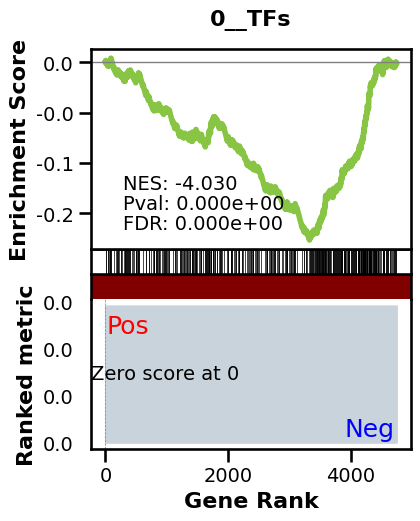

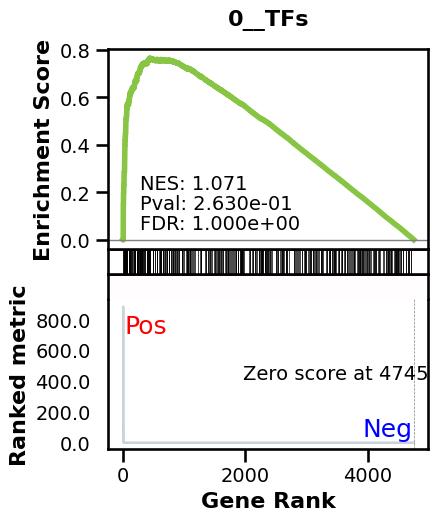

_________________________________________
TF specific enrichment


found some significant results for  3.4482758620689653 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3317 genes
intersection pct: 0.6980218855218855
precision:  0.001612544216131459 
recall:  1.0 
random precision: 0.0016130305081146108



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▌         | 7/128 [00:00<00:01, 62.31it/s]


 11%|█         | 14/128 [00:00<00:01, 62.00it/s]


 16%|█▋        | 21/128 [00:00<00:01, 62.13it/s]


 22%|██▏       | 28/128 [00:00<00:01, 62.11it/s]


 27%|██▋       | 35/128 [00:00<00:01, 62.09it/s]


 33%|███▎      | 42/128 [00:00<00:01, 62.15it/s]


 38%|███▊      | 49/128 [00:00<00:01, 62.15it/s]


 44%|████▍     | 56/128 [00:00<00:01, 62.23it/s]


 49%|████▉     | 63/128 [00:01<00:01, 62.16it/s]


 55%|█████▍    | 70/128 [00:01<00:00, 62.24it/s]


 60%|██████    | 77/128 [00:01<00:00, 62.19it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 62.19it/s]


 71%|███████   | 91/128 [00:01<00:00, 62.20it/s]


 77%|███████▋  | 98/128 [00:01<00:00, 62.25it/s]


 82%|████████▏ | 105/128 [00:01<00:00, 62.26it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 62.26it/s]


 93%|█████████▎| 119/128 [00:01<00:00, 62.31it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 62.22it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 62.15it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0023584264412737322
EPR: 1.1887701880093962


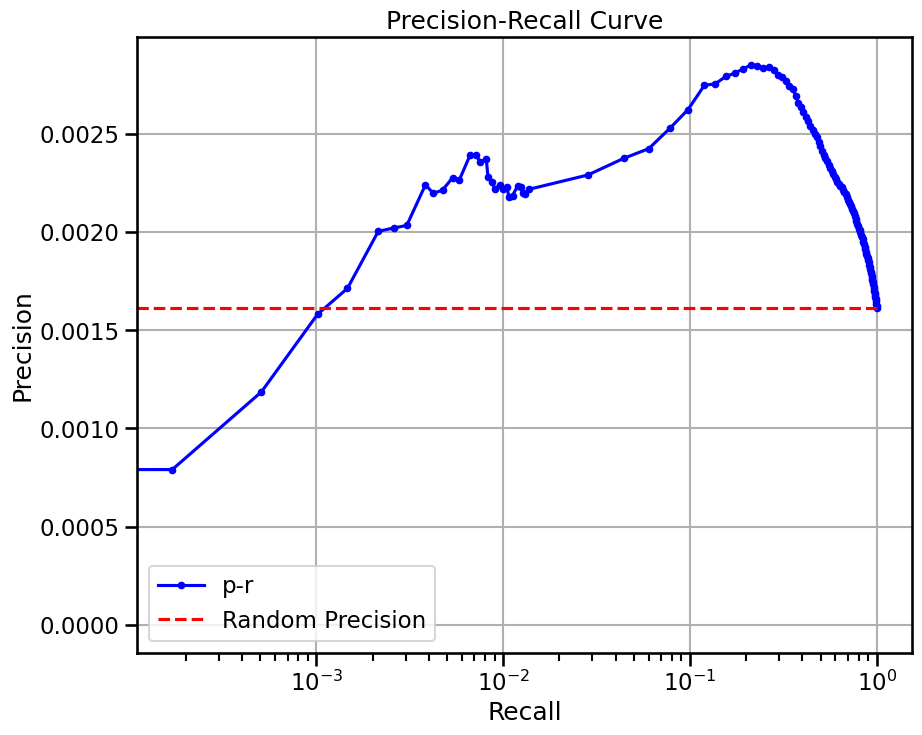

In [7]:
grn.var['ensembl_id'] = grn.var.index
grn.var.index = grn.var['symbol']
grn.varp['GRN'] = grn.varp["all"][:,:,-4:].mean(-1)
metrics['scprint_mean_perturb_base'] = BenGRN(grn, do_auc=True, doplot=True).scprint_benchmark()

<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

true elem 17394 ...


doing classification....


/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:318: RuntimeWarning: invalid value encountered in scalar divide
  "precision": (pred[y_test == 1] == 1).sum() / (pred == 1).sum(),


metrics {'used_heads': 0, 'precision': nan, 'random_precision': 0.001610562441384053, 'recall': 0.0, 'predicted_true': 0.0, 'number_of_true': 1719.0}


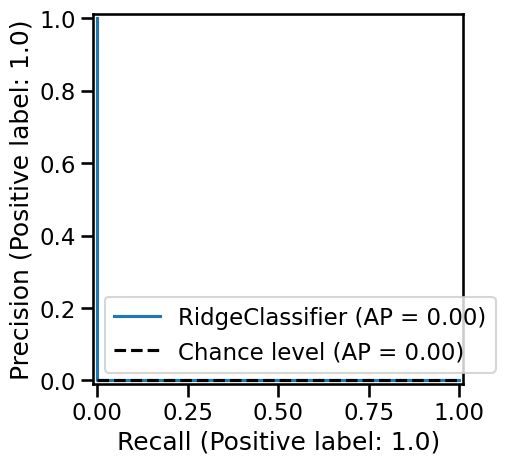

ValueError: cannot reshape array of size 22581504 into shape (4752,4752,2)

In [8]:
grn.varp['GRN'] = grn.varp["all"]
grn.var.index = grn.var['ensembl_id']
grn, m, clf_omni = train_classifier(grn, C=0.1, train_size=0.9, class_weight={
                                    1: 50, 0: 1}, shuffle=True, use_col="gene_name")
grn.varp['GRN'] = grn.varp['classified'].T

metrics['scprint_omni_perturb'] = BenGRN(grn, do_auc=True, doplot=True).compare_to(other=adata)


In [ ]:
grn.var.index = grn.var['symbol']
grn.varp['GRN'] = grn.varp['classified']
metrics['scprint_omni_perturb_base'] = BenGRN(grn, do_auc=True, doplot=True).scprint_benchmark()

In [ ]:
import numpy as np

In [ ]:
grn.varp['GRN'] = np.transpose(grn.varp['all'], (1,0,2))
grn.var.index = grn.var['ensembl_id']
grn, m, clf_self = train_classifier(grn, other=adata, C=0.8, train_size=0.5, class_weight={
                               1: 10, 0: 1}, shuffle=False, use_col="ensembl_id")
grn.varp['GRN'] = grn.varp['classified']

In [ ]:
metrics['scprint_self_perturb'] = BenGRN(grn, do_auc=True, doplot=True).compare_to(other=adata)

In [ ]:
metrics

In [ ]:
import pandas as pd

In [ ]:
res = []
res2 = []
for k, v in metrics.items():
    if k.split('_')[-1] == "base":
        res2.append([k.split('_')[-2], v['epr'], v['auprc'], v['rand_precision'], v['significant_enriched_TFtargets'], v.get('TF_enr', False), 'tf_' in k])
    else:
        res.append(["_".join(k.split('_')[-2:-1]), v['epr'], v['auprc'], v['rand_precision'], 'tf_' in k])

df = pd.DataFrame(res, columns=['name','EPR', 'AUPRC', 'RAND', 'TF_only'])
df2 = pd.DataFrame(res2, columns=['name','EPR', 'AUPRC', 'RAND', 'TF_targ', 'TF_enr', 'TF_only'])
df

In [ ]:
df2